In [1]:
using LinearAlgebra 
#using Gadfly  
using Plots
using StaticArrays 
using SparseArrays 
using Arpack  
using JeszenszkiBasis
#Variables globales N,M,D
global N=3
global M=3
global D=Int((factorial(M+N-1))/(factorial(M-1)*factorial(N))) 

#funcion primos 
p(i)=100i+3
#Generamos la base en orden lexicografico para N=M=3
# v = []; 
# i=1;
# for n1 in 0:N  
#     for n2 in 0:(N-n1)  
#         for n3 in 0:(N-n1-n2)  
#             if n1+n2+n3 != N
#                 continue 
#             end
#             pushfirst!(v, [n1,n2,n3]) 
#         end
#     end
# end    
v = Szbasis(M, N)  

Szbasis(3, 3, 10, [3 2 … 0 0; 0 1 … 1 0; 0 0 … 2 3])

In [2]:
function tag(b,M)
    tag=0;
    for i in 1:M
        tag += (√p(i))*b[i] 
    end
    return tag 
end

tag (generic function with 1 method)

In [3]:
function creation_ann(k,j,v)     
    if(v[j] >= 1) 
        b = copy(v)
        value = sqrt(((b[k])+1)*b[j])
        b[j] -= 1; 
        b[k] += 1;    
        return [value , b]   
    else 
        return 0; 
    end 
end   

creation_ann (generic function with 1 method)

In [15]:
function matrixofcreationann(i,k)
    mat = spzeros(D,D)
    for j in 1:D 
        if(creation_ann(i,k,v[j])==0) 
            continue
        end
        mat[DictOfInds[tag(creation_ann( i, k , v[j] )[2],M)], j] = creation_ann(i, k , v[j])[1] 
    end   
    return rot180(mat) 
end

matrixofcreationann (generic function with 1 method)

In [4]:
function creationanG(k,j,v)     
    if(v[j] > 0)  
        b = copy(v)
        value = sqrt(((v[k])+1)*v[j]) 
        b[j] -= 1 
        b[k] += 1    
        return (value*dot(b,v))     
    else 
        return 0; 
    end 
end   

creationanG (generic function with 1 method)

In [5]:
#Valores de la diagonal de los numeros de ocupacion
function valdiags(k, v, M)  
    if(v[k] >= 1)  
        return  (v[k]*(v[k]-1))/2  
    else 
        return 0;
    end  
end       

valdiags (generic function with 1 method)

In [6]:
#Array de tags 
T = []
for i in 1:length(v) 
     push!(T,  tag( v[i] , M )) 
end

In [7]:
#Ordenamos y hacemos un diccionario Tsorted => indices
inds = sortperm(T);
Tsorted = T[inds];
#DictOfInds = Dict(zip(Tsorted, inds)) 
DictOfInds = Dict(Tsorted .=> inds)

Dict{Float64, Int64} with 10 entries:
  30.4467 => 1
  34.5456 => 2
  42.7434 => 4
  44.9627 => 8
  41.8036 => 6
  49.0616 => 9
  38.6445 => 3
  37.7047 => 5
  45.9025 => 7
  52.2207 => 10

Any[3.0, 1.0, 1.0, 3.0, 1.0, 0.0, 1.0, 1.0, 1.0, 3.0]


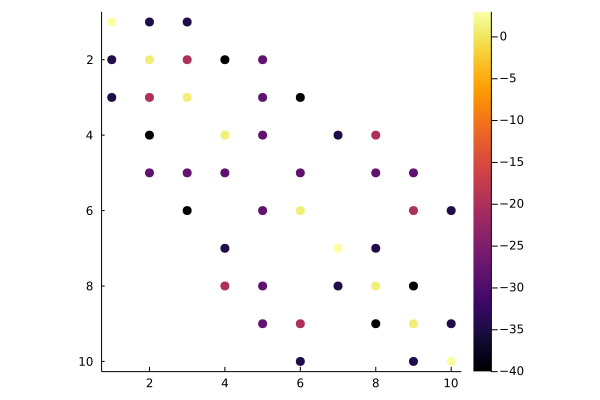

In [9]:
#for t in 1:10
#    J=10
#    U=t*J*0.1 
#obtener H_int 
diagscomp = [];
for j in 1:D 
    sumsdeocup = []; 
    for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
    end  
    push!(diagscomp, sum(sumsdeocup))    
end   
#Mostramos la parte  
println(diagscomp)
Hint = spzeros(D,D)
Hint[diagind(Hint)] = diagscomp; Hint 
#println(Hint)
#Hint=diagm(diagscomp) 
#spy(Hint) 
J = 20
Hkin = spzeros(D,D)
#firstcolumn = [] 
for j in 1:D
    for k in 1:M 
        for h in 1:M   
            if k == h 
                break 
            elseif creation_ann(k,h,v[j]) == 0 
                continue 
            else 
                 Hkin[DictOfInds[tag(creation_ann( k, h , v[j] )[2],M)], j] = -J*(creation_ann( k, h , v[j])[1])     
            end
        end 
    end  
end  
Hkin = Symmetric(Hkin, :L)
#println(Hkin)  
#spy(Hkin)
#end    
H=rot180(Hkin+Hint) 
#H=Hkin+Hint
spy(H, markersize = 5)

In [10]:
Eval, Evec = eigs(H , nev=2 , which=:SR)

([-119.00550972827367, -58.34436114160425], [0.1892765183646907 0.2715859780478461; 0.33331554134792163 0.43464354393675153; … ; 0.3333155413479214 -0.4327892176712349; 0.1892765183646903 -0.4611460627644778], 2, 1, 10, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [11]:
Evec

10×2 Matrix{Float64}:
 0.189277   0.271586
 0.333316   0.434644
 0.333316   0.046297
 0.333316   0.386492
 0.475319  -5.55112e-17
 0.333316  -0.383836
 0.189277   0.18956
 0.333316  -0.050808
 0.333316  -0.432789
 0.189277  -0.461146

In [12]:
H

10×10 SparseMatrixCSC{Float64, Int64} with 45 stored entries:
   3.0    -34.641   -34.641      ⋅      …     ⋅         ⋅         ⋅ 
 -34.641    1.0     -20.0     -40.0           ⋅         ⋅         ⋅ 
 -34.641  -20.0       1.0        ⋅            ⋅         ⋅         ⋅ 
    ⋅     -40.0        ⋅        1.0        -20.0        ⋅         ⋅ 
    ⋅     -28.2843  -28.2843  -28.2843     -28.2843  -28.2843     ⋅ 
    ⋅        ⋅      -40.0        ⋅      …     ⋅      -20.0     -34.641
    ⋅        ⋅         ⋅      -34.641      -34.641      ⋅         ⋅ 
    ⋅        ⋅         ⋅      -20.0          1.0     -40.0        ⋅ 
    ⋅        ⋅         ⋅         ⋅         -40.0       1.0     -34.641
    ⋅        ⋅         ⋅         ⋅            ⋅      -34.641     3.0

In [13]:
G = Evec[:,1] 

10-element Vector{Float64}:
 0.1892765183646907
 0.33331554134792163
 0.33331554134792174
 0.3333155413479211
 0.4753185228484954
 0.3333155413479216
 0.18927651836469012
 0.3333155413479212
 0.3333155413479214
 0.1892765183646903

In [23]:
SPDM = spzeros(M,M) 
for k in 1:M 
    for h in 1:M   
        if k == h 
            break 
        else  
            t = matrixofcreationann(k,h)*G
            SPDM[k , h] = dot(G,t)  
        end
    end  
end  
SPDM = Symmetric(SPDM, :L)

3×3 Symmetric{Float64, SparseMatrixCSC{Float64, Int64}}:
 0.0       0.999954  0.999954
 0.999954  0.0       0.999954
 0.999954  0.999954  0.0

In [39]:
for t in 1:20
    J=10
    U=t*J*0.5
    diagscomp = [];
    for j in 1:D 
        sumsdeocup = []; 
        for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
        end  
        push!(diagscomp, sum(sumsdeocup))    
    end    
    Vals = U*diagscomp
    Hint = spzeros(D,D)
    Hint[diagind(Hint)] = Vals; Hint 
    Hkin = spzeros(D,D)
    firstcolumn = [] 
    for j in 1:D
        for k in 1:M 
            for h in 1:M   
                if k == h 
                    break 
                elseif creation_ann(k,h,v[j]) == 0 
                    continue 
                else 
                     Hkin[DictOfInds[tag(creation_ann( k, h , v[j] )[2],M)], j] = -J*(creation_ann( k, h , v[j])[1])     
                end
            end 
        end  
    end  
    Hkin = Symmetric(Hkin, :L)  
    H=rot180(Hkin+Hint)  
    Eval, Evec = eigs(H,nev=2,which=:SR) 
    G = Evec[:,1]   
    global var = []
    global var2 = []
    for i in 1:D  
        push!(var, G[i]) 
        push!(var2, (G[i])^2 )
    end 
    variance = sqrt(G[4]-(var[4])^2)  
    println(G[1])
end   
#println(var[1])
#plot(fract, UJ)

-0.1635616959500708
-0.14014352580859557
0.12097968427062591
-0.10510654013888587
0.09179994045491593
-0.08052550562132194
0.07088913935545282
0.06259719181972323
-0.05542679675069831
0.049204651419774106
-0.043792280569659156
0.03907608165756625
0.03496076471367093
-0.03136509648551444
0.028219129748436322
-0.02546233904596995
0.023042282812324677
-0.020913561879344567
0.019036947230580803
-0.017378613672295845


In [28]:
G

10-element Vector{Float64}:
 -0.1635616959500707
 -0.3317261321172084
 -0.33172613211720836
 -0.33172613211720803
 -0.509400976125046
 -0.33172613211720814
 -0.16356169595007058
 -0.331726132117208
 -0.331726132117208
 -0.16356169595007064

In [289]:
#creation_ann(2,1,v[1]) It works! 
v

10-element Vector{Any}:
 [3, 0, 0]
 [2, 1, 0]
 [2, 0, 1]
 [1, 2, 0]
 [1, 1, 1]
 [1, 0, 2]
 [0, 3, 0]
 [0, 2, 1]
 [0, 1, 2]
 [0, 0, 3]

In [10]:
# arr = [0,0,3,0];  
# arr[1];
# v[2] 
# function sumyprod(x,y) 
#     suma = x+y 
#     prod = x*y 
#     return suma, prod 
# end 
# for i in 1:10 
#     for j in 1:3
#         println(i, j, sumyprod(i , j) )
#     end 
# end

In [11]:
#creation_ann(1,2,v[2])
#tag(creation_ann(1,2,v[10]), M)  
#valdiags(10, v[10]) 
#v[2]

In [13]:
# for j in 1:10
#     cont = 0;
#     for i in 1:10  
#         cont+= i   
#         if(cont == 55)
#             println(cont, " ", j) 
#         end
#     end 
# end  
#valdiags(1, v[5], M)


In [229]:
#Matrix for 1,2   
a12 = spzeros(D,D)
for u in 1:D   
    for k in 1:D
        a12[u,k] = creation_ann(1,2,v[k])[1]
    end
end
a12

10×10 SparseMatrixCSC{Float64, Int64} with 60 stored entries:
  ⋅   1.73205  2.0  1.73205   ⋅   1.41421  1.41421   ⋅   1.0   ⋅ 
  ⋅   1.73205  2.0  1.73205   ⋅   1.41421  1.41421   ⋅   1.0   ⋅ 
  ⋅   1.73205  2.0  1.73205   ⋅   1.41421  1.41421   ⋅   1.0   ⋅ 
  ⋅   1.73205  2.0  1.73205   ⋅   1.41421  1.41421   ⋅   1.0   ⋅ 
  ⋅   1.73205  2.0  1.73205   ⋅   1.41421  1.41421   ⋅   1.0   ⋅ 
  ⋅   1.73205  2.0  1.73205   ⋅   1.41421  1.41421   ⋅   1.0   ⋅ 
  ⋅   1.73205  2.0  1.73205   ⋅   1.41421  1.41421   ⋅   1.0   ⋅ 
  ⋅   1.73205  2.0  1.73205   ⋅   1.41421  1.41421   ⋅   1.0   ⋅ 
  ⋅   1.73205  2.0  1.73205   ⋅   1.41421  1.41421   ⋅   1.0   ⋅ 
  ⋅   1.73205  2.0  1.73205   ⋅   1.41421  1.41421   ⋅   1.0   ⋅ 

In [363]:
matrixofcreationann(2,1)

10×10 SparseMatrixCSC{Float64, Int64} with 6 stored entries:
  ⋅        ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅    ⋅    ⋅ 
 1.73205   ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅    ⋅    ⋅ 
  ⋅       2.0   ⋅        ⋅    ⋅        ⋅        ⋅    ⋅    ⋅    ⋅ 
  ⋅        ⋅   1.73205   ⋅    ⋅        ⋅        ⋅    ⋅    ⋅    ⋅ 
  ⋅        ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅    ⋅    ⋅ 
  ⋅        ⋅    ⋅        ⋅   1.41421   ⋅        ⋅    ⋅    ⋅    ⋅ 
  ⋅        ⋅    ⋅        ⋅    ⋅       1.41421   ⋅    ⋅    ⋅    ⋅ 
  ⋅        ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅    ⋅    ⋅ 
  ⋅        ⋅    ⋅        ⋅    ⋅        ⋅        ⋅   1.0   ⋅    ⋅ 
  ⋅        ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅    ⋅    ⋅ 

In [362]:
creation_ann(2,3,v[10])

2-element Vector{Any}:
 1.7320508075688772
  [0, 1, 2]

In [357]:
v[9]

3-element view(::Matrix{Int64}, :, 9) with eltype Int64:
 0
 1
 2

In [252]:
a12*t

10×10 Matrix{Float64}:
 0.0        0.0       0.0       0.0       …  0.0       0.0        0.0
 0.397762   0.700216  0.704392  0.766087     0.108265  0.872769   0.800912
 0.543451   0.304482  0.633113  0.907778     0.43822   0.289602   0.264092
 0.407006   0.386507  0.868429  0.408304     0.238063  0.102256   0.525052
 0.0        0.0       0.0       0.0          0.0       0.0        0.0
 0.0397973  0.855657  0.406814  0.531925  …  0.508136  0.0598169  0.241222
 0.682818   0.195279  0.82833   0.410657     0.614474  0.245067   0.172174
 0.0        0.0       0.0       0.0          0.0       0.0        0.0
 0.0789091  0.101216  0.514263  0.518546     0.425645  0.426411   0.679419
 0.0        0.0       0.0       0.0          0.0       0.0        0.0

In [254]:
a12*t

10×10 Matrix{Float64}:
 0.543451  0.304482  0.633113  0.907778  …  0.43822   0.289602  0.264092
 0.407006  0.386507  0.868429  0.408304     0.238063  0.102256  0.525052
 0.15618   0.350977  0.461526  0.33728      0.740168  0.430158  0.440952
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.682818  0.195279  0.82833   0.410657     0.614474  0.245067  0.172174
 0.30623   0.174836  0.972613  0.108055  …  0.860587  0.436411  0.858972
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.866426  0.367968  0.577975  0.138853     0.181564  0.216868  0.244591
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0